## Import

In [244]:
import pandas as pd
import numpy as np

In [245]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.expand_frame_repr', True)

In [246]:
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import datetime
import warnings
warnings.filterwarnings('ignore')

In [247]:
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 4)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 8
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

In [248]:
train = pd.read_csv('./train_data.csv')

In [249]:
train.describe()

,cust_id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var21,var22,var23,var24,var25,var26,var27,var28,var29,var31,var32
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,3.000000e+05,300000.000000,300000.000000,300000.000000,300000.00000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,290084.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250000.500000,2987.161307,0.567820,0.404513,4893.003973,0.513093,5.039663,2.242540,25.506757,3.205377e+05,3.189960,0.354827,567.004417,509.44858,0.431947,241.379920,0.053737,21.047837,91421.038147,43.971097,10.366787,0.053883,18.258913,210.077323,16.598460,15.211177,0.293537,0.373733
std,86602.684716,3349.886526,3.352299,0.632648,10742.376343,1.969464,2.933883,8.078042,81.535553,2.648355e+05,14.641967,1.131227,1185.068602,378.77933,0.976899,419.362044,0.225498,19.665769,47805.244109,28.366845,19.296733,0.225788,73.270510,1024.015097,114.512098,100.515091,1.699881,0.483795
min,100001.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,175000.750000,544.000000,0.000000,0.000000,688.000000,0.000000,2.000000,0.000000,0.000000,1.628160e+05,0.000000,0.000000,27.000000,174.00000,0.000000,63.000000,0.000000,8.000000,58668.750000,23.000000,0.000000,0.000000,2.000000,79.000000,0.000000,0.000000,0.000000,0.000000
50%,250000.500000,1862.000000,0.000000,0.000000,2161.000000,0.000000,5.000000,0.000000,3.000000,2.620815e+05,0.000000,0.000000,183.000000,437.00000,0.000000,141.000000,0.000000,15.000000,85514.000000,43.000000,0.000000,0.000000,5.000000,136.000000,0.000000,0.000000,0.000000,0.000000
75%,325000.250000,3616.000000,0.000000,1.000000,5302.000000,0.000000,8.000000,0.000000,20.000000,3.496402e+05,1.000000,0.000000,589.000000,708.00000,1.000000,225.000000,0.000000,34.000000,105833.250000,69.000000,16.000000,0.000000,10.000000,181.000000,7.000000,7.000000,0.000000,1.000000
max,400000.000000,17337.000000,31.000000,4.000000,103192.000000,20.000000,9.000000,104.000000,1783.000000,1.950000e+06,343.000000,11.000000,10198.000000,1893.00000,12.000000,3806.000000,1.000000,100.000000,343515.000000,99.000000,148.000000,1.000000,845.000000,21814.000000,2338.000000,2023.000000,28.000000,1.000000


#### Targert Analysis

In [250]:
train['self_service_platform'].value_counts()

Desktop       184194
Mobile App     55595
Mobile Web     48063
STB            12148
Name: self_service_platform, dtype: int64

In [251]:
categorical = train.select_dtypes(include=[np.object])
categorical = categorical.columns

numeric = train.select_dtypes(include=[np.int,np.float])
numeric = numeric.columns

### Preprocessing

### Encoding

In [252]:
categorical

Index(['var30', 'var33', 'var34', 'var35', 'var36', 'var37', 'var38', 'var39',
       'var40', 'self_service_platform'],
      dtype='object')

In [253]:
for i in categorical:
    print('no of categories in {} are {}'.format(i, train[i].nunique()))

no of categories in var30 are 1
no of categories in var33 are 6
no of categories in var34 are 5
no of categories in var35 are 3
no of categories in var36 are 14
no of categories in var37 are 2
no of categories in var38 are 3
no of categories in var39 are 5
no of categories in var40 are 2
no of categories in self_service_platform are 4


In [254]:
for i in categorical:
    print('no of categories in {} are \n {}'.format(i, train[i].value_counts()),'\n')

no of categories in var30 are 
 .    300000
Name: var30, dtype: int64 

no of categories in var33 are 
 other                     272972
news_channel1               8285
news_channel2               6062
entertainment_channel1      5563
entertainment_channel2      4904
movie_channel1              2214
Name: var33, dtype: int64 

no of categories in var34 are 
 Never        105758
Pending      104447
Active        48580
Inactive      34526
Cancelled      6689
Name: var34, dtype: int64 

no of categories in var35 are 
 Standard               283150
CreditCard              10127
Electronic Transfer      6723
Name: var35, dtype: int64 

no of categories in var36 are 
 Video/Internet                       104654
Video/Internet/Voice                  98173
Internet Only                         63010
Video Only                             9195
Internet/Voice                         8072
Video/Internet/Voice/Homesecurity      5603
Video/Internet/Homesecurity            5153
Internet/Homesecurit

In [255]:
### remove 30
## binary encode - 37, 40

In [256]:
train.drop(['var30'],axis=1,inplace=True)

from sklearn.preprocessing import LabelEncoder

for i in categorical.drop(['var30','var37','var40','self_service_platform']):
    le = LabelEncoder()
    train[i] = le.fit_transform(train[i].astype(str))

In [257]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

for i in ['var37','var40']:
    le_bin = LabelBinarizer()
    train[i] = le_bin.fit_transform(train[i].astype(str))

In [258]:
train['self_service_platform'].value_counts()

Desktop       184194
Mobile App     55595
Mobile Web     48063
STB            12148
Name: self_service_platform, dtype: int64

### Watch Out this step!!!

In [259]:
# train.replace(['Mobile App', 'Mobile Web'],['Mobile','Mobile'],inplace=True)

###############

In [260]:
le_target = LabelEncoder()
train['self_service_platform'] = le_target.fit_transform(train['self_service_platform'])

In [261]:
train['self_service_platform'].value_counts()

0    184194
1     55595
2     48063
3     12148
Name: self_service_platform, dtype: int64

### NaN impute

In [262]:
train[train['var24'].isna()]

,cust_id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var21,var22,var23,var24,var25,var26,var27,var28,var29,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,self_service_platform
17,100018,3788,0,1,3550,0,8,1,8,336772,1,0,343,648,0,207,0,21,106281,54,NaN,0,8,177,5,4,0,1,5,4,2,9,1,3,4,0,0
66,100067,3900,0,0,3625,0,7,0,10,342015,0,0,343,659,1,212,0,21,105229,57,NaN,0,7,181,4,2,0,1,5,4,2,1,1,3,2,0,0
74,100075,4066,0,1,3217,0,8,0,10,340170,0,0,393,701,1,209,0,19,106670,58,NaN,0,8,170,5,4,0,1,5,1,2,7,1,3,2,0,0
83,100084,3793,0,0,3397,0,7,0,9,347052,0,0,343,669,1,198,0,19,106613,52,NaN,0,8,180,2,2,0,1,4,0,2,10,1,3,4,1,0
123,100124,3893,0,0,3489,0,7,1,9,343461,0,0,393,667,0,209,0,20,106637,57,NaN,0,7,179,2,4,0,0,5,4,2,9,1,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299902,399903,3842,0,1,3392,0,8,1,9,344112,1,0,393,655,1,211,0,21,108150,52,NaN,0,8,180,5,5,0,1,5,3,2,9,1,0,4,0,0
299911,399912,4172,0,1,3307,0,7,0,10,342575,1,0,333,649,1,211,0,21,106555,56,NaN,0,8,170,2,5,0,1,5,3,2,7,0,3,4,1,0
299970,399971,4277,0,0,3356,0,7,0,8,342120,1,0,347,652,1,200,0,21,105595,55,NaN,0,8,171,6,3,0,1,5,3,2,9,1,1,2,0,0
299993,399994,4273,0,0,3192,0,7,0,10,340542,0,0,396,646,0,209,0,21,107295,54,NaN,0,7,177,4,3,0,0,5,0,2,9,1,3,2,0,0


In [263]:
train[train['var24'].isna()]['var9'].describe()

count      9916.000000
mean     346832.164986
std        5943.566126
min      336543.000000
25%      341680.750000
50%      346922.500000
75%      351956.500000
max      357025.000000
Name: var9, dtype: float64

In [264]:
train[train['var24'].isna()]['self_service_platform'].value_counts()

0    7940
1     880
2     829
3     267
Name: self_service_platform, dtype: int64

In [265]:
train[train['var24'].isna()]['var27'].describe()

count    9916.00000
mean      175.50363
std         3.43605
min       170.00000
25%       173.00000
50%       175.00000
75%       179.00000
max       181.00000
Name: var27, dtype: float64

In [266]:
#### exceptional behaviour

In [267]:
# train['var24'].fillna(-999,inplace=True)

### FE

In [268]:
# ## didnt perform good
# train['total_devices'] = train['var3'] + train['var11']
# train['more_vod'] = (train['var8']>23).astype(int)

# train['device_cat'] = pd.cut(train['var11'], bins=[-1,3,8,12],labels=[1,2,3])
# train = pd.get_dummies(train,columns=['device_cat'])

# train['var5_bin'] = pd.cut(train['var5'],bins=[-1,5,14,18,20],labels=[1,2,3,4])
# train['voice_indicator'] = ((train['var5']>4) & (train['var5']<18)).astype(int)
# train['display_indicator'] = ((train['var11']>3) & (train['var11']<9)).astype(int)

# train['percent_video_issue'] = train['var15']/train['var26']

# train['percent_ivr_issues'] = train['var10']/train['var26']

# train['total_video_tenure'] = train['var13']/(train['var1'])

# train['email_per_std'] = train['var7']/(train['var6'])

# train['income_by_home'] = train['var22']/train['var9']

# train['customer_interaction']=train['var29']+train['var26']

# train['self_service'] = train['var38'].apply(lambda x:'self_service' if x==2 else x  )
# train['self_service'].replace([3,1,0,'self_service'],[0,0,0,1],inplace=True)

# train['video_centric']=train['var8']+train['var15']+train['var14']

# train['economic_standing']=((train['var6']+1)*(train['var22']+train['var9'])*(train['var27']))/((train['var21']+1)/100)

In [269]:
### currently under experiment
train['economic_standing']=((train['var6']+1)*(train['var22']+train['var9'])*(train['var27']))/((train['var21']+1)/100)

In [270]:
#######performed better
train['load'] = (train['var27']/train['var22'])*100
train['status_vs_loyal'] = train['var21']/(train['var6']+1)
train['connect_per_device'] = train['var4']/(train['var11']+1)


### Model Building Part 1

In [271]:
train.columns

Index(['cust_id', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7',
       'var8', 'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15',
       'var16', 'var21', 'var22', 'var23', 'var24', 'var25', 'var26', 'var27',
       'var28', 'var29', 'var31', 'var32', 'var33', 'var34', 'var35', 'var36',
       'var37', 'var38', 'var39', 'var40', 'self_service_platform',
       'economic_standing', 'load', 'status_vs_loyal', 'connect_per_device'],
      dtype='object')

In [272]:
from sklearn.model_selection import train_test_split

x_t,x_v, y_t, y_v = train_test_split(train.drop(['cust_id','self_service_platform'],axis=1),train['self_service_platform'],test_size=0.2,random_state=353)



In [273]:
%%time
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# model = XGBClassifier(n_estimators=300)
model = LGBMClassifier(n_estimators=100)
model.fit(x_t,y_t)

model.score(x_t,y_t)

Wall time: 17.4 s


0.7450791666666666

In [274]:
model.score(x_v,y_v)

0.7485166666666667

In [275]:
### XGB
# 0.7760666666666667 - No FE at all with only three classes (mobile combined)
# 0.7762833333333333 - With display indicator 3 classes
# 0.7757666666666667 - with loyalty and display_indicator 3 classes

# 0.74565 - with loyalty and display indicator 4 classes

### LGBM
# 0.7491 - with load and status_vs_loyal and connect_per_device
# 0.7490166666666667 - with load and status_vs_loyal
# 0.7488666666666667 - with load
# 0.7484166666666666 - only with loyalty 4 classes
# 0.7483666666666666 - with loyalty and display indicator 4 classes
# 0.7487666666666667 - with no FE at all






In [276]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

preds = model.predict(x_v)
accuracy_score(preds,y_v)

0.7485166666666667

In [277]:
confusion_matrix(preds,y_v)

array([[32265,  3788,  3361,  1079],
       [ 2318,  6429,   845,   270],
       [ 1933,   754,  5368,   210],
       [  317,   102,   112,   849]], dtype=int64)

In [238]:
###LGBM
# array([[32241,  3767,  3320,  1073],
#        [ 2327,  6466,   865,   274],
#        [ 1947,   738,  5389,   211],
#        [  318,   102,   112,   850]]) - with load and status_vs_loyal and connect_per_device

# array([[32247,  3781,  3329,  1078],
#        [ 2319,  6445,   847,   271],
#        [ 1949,   745,  5399,   209],
#        [  318,   102,   111,   850]]) - with load and status_vs_loyal

# array([[32259,  3777,  3356,  1073],
#        [ 2318,  6446,   843,   271],
#        [ 1936,   748,  5375,   212],
#        [  320,   102,   112,   852]]) - with load

# array([[32239,  3766,  3323,  1077],
#        [ 2325,  6439,   850,   273],
#        [ 1951,   767,  5401,   211],
#        [  318,   101,   112,   847]])
# with no FE at all

# array([[32232,  3774,  3317,  1075],
#        [ 2329,  6442,   878,   274],
#        [ 1954,   756,  5379,   210],
#        [  318,   101,   112,   849]])

# array([[32234,  3779,  3314,  1073],
#        [ 2327,  6443,   882,   274],
#        [ 1954,   750,  5378,   211],
#        [  318,   101,   112,   850]]) - with loyalty 4 classes



In [278]:
### xgb
# array([[32329,  3862,  3560,  1088],
#        [ 2297,  6379,   842,   273],
#        [ 1892,   733,  5173,   206],
#        [  315,    99,   111,   841]])
# 0.7453666666666666

# array([[32150,  6969,  1072],
#        [ 4373, 13584,   506],
#        [  310,   206,   830]]) - No FE three classes


# array([[32150,  6957,  1071],
#        [ 4372, 13595,   505],
#        [  311,   207,   832]]) - With display_indicator

# array([[32325,  3873,  3504,  1092],
#        [ 2311,  6355,   855,   274],
#        [ 1883,   745,  5216,   199],
#        [  314,   100,   111,   843]]) - with display_ind and loyalty



In [279]:
train['self_service_platform'].value_counts()

0    184194
1     55595
2     48063
3     12148
Name: self_service_platform, dtype: int64

In [280]:
y_v.value_counts()

0    36833
1    11073
2     9686
3     2408
Name: self_service_platform, dtype: int64

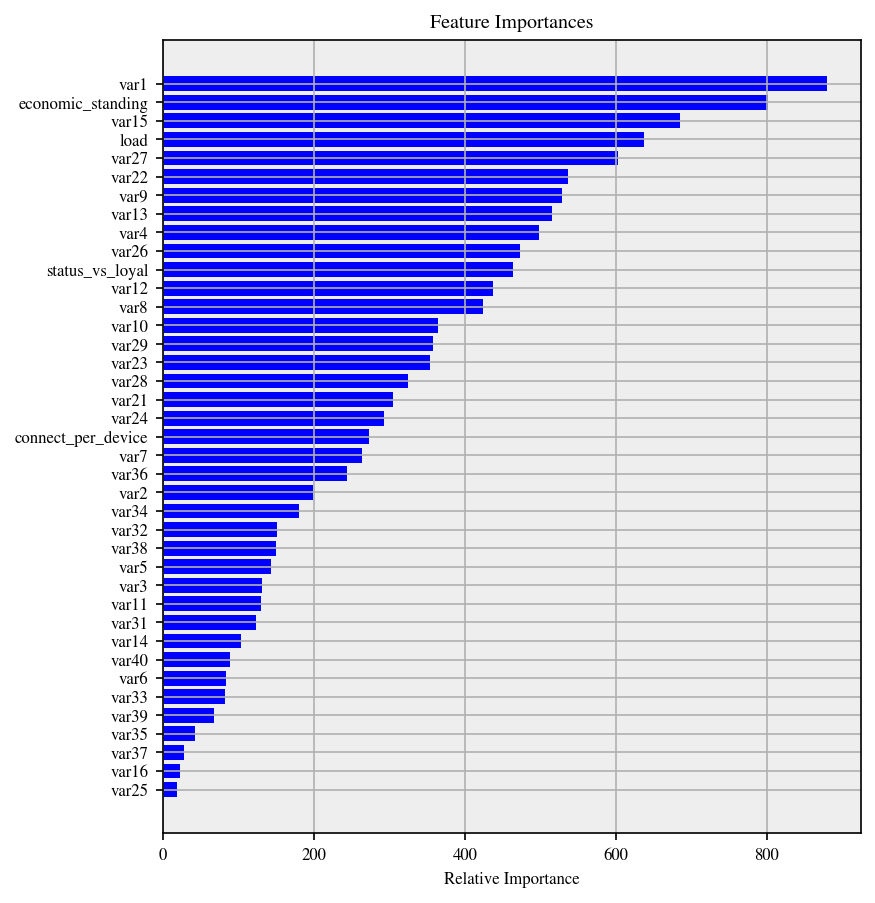

In [281]:
features = x_t.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


### Lets inspect the inaccurate preds

In [40]:
x_v.reset_index(drop=True,inplace=True)
x_t.reset_index(drop=True,inplace=True)

y_v.reset_index(drop=True,inplace=True)
y_t.reset_index(drop=True,inplace=True)

In [41]:
preds = pd.Series(preds)

In [42]:
train['self_service_platform'].value_counts()

# Desktop       184194
# Mobile App     55595
# Mobile Web     48063
# STB            12148

0    184194
1     55595
2     48063
3     12148
Name: self_service_platform, dtype: int64

In [43]:
bad_preds = x_v[y_v!=preds]

bad_preds['truth'] = y_v[y_v!=preds]
bad_preds['preds'] = preds[y_v!=preds]

In [44]:
bad_preds[['truth','preds']] = bad_preds[['truth','preds']].replace([0,1,2,3],['Desktop','Mobile App','Mobile Web','STB'])

In [45]:
# bad_preds.to_csv('exl_bad_preds.csv',index=False,header=True)

In [46]:
bad_preds

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var21,var22,var23,var24,var25,var26,var27,var28,var29,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,load,status_vs_loyal,connect_per_device,truth,preds
6,12434,11,1,23902,4,8,14,246,465758,45,7,6860,1156,3,531,1,75,122176,95,24.0,1,237,229,150,279,10,1,5,4,2,3,1,1,4,1,0.187435,8.333333,2987.75,Desktop,Mobile Web
15,2738,0,0,2323,0,6,0,4,273974,0,0,98,444,0,135,0,11,80562,37,0.0,0,3,151,0,0,0,0,5,3,2,1,1,3,2,0,0.187433,1.571429,2323.00,Mobile App,Desktop
20,2961,0,1,5970,0,8,0,39,274032,1,0,411,828,0,263,0,53,85042,82,11.0,0,6,186,0,6,0,0,5,4,2,7,1,3,4,0,0.218715,5.888889,5970.00,Desktop,Mobile Web
29,13274,24,1,33023,0,8,28,369,459639,39,1,6473,1605,1,2249,1,70,212460,95,66.0,0,53,214,193,106,0,1,5,3,2,2,1,3,4,0,0.100725,7.777778,16511.50,Desktop,Mobile Web
40,340,0,0,901,0,2,0,2,159101,0,0,66,358,0,66,0,16,65543,42,0.0,0,3,76,0,1,0,1,5,2,2,7,1,0,4,1,0.115954,5.333333,901.00,Desktop,Mobile App
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59989,2193,0,0,1267,0,5,0,2,266420,0,0,78,490,0,106,0,12,95625,33,1.0,0,3,124,0,0,0,0,5,4,2,10,1,3,4,0,0.129673,2.000000,1267.00,Mobile App,Desktop
59992,1713,0,1,5123,0,6,0,2,368695,2,0,446,685,0,263,0,41,87634,84,13.0,0,10,199,8,5,0,0,5,4,2,9,1,0,2,0,0.227081,5.857143,5123.00,STB,Mobile Web
59993,12760,0,1,7810,3,9,14,65,761019,9,1,1162,1456,2,648,1,51,180243,83,26.0,0,24,257,23,27,0,1,5,3,2,9,1,3,4,0,0.142585,5.100000,3905.00,Mobile App,Desktop
59994,751,0,0,1700,0,2,0,0,198231,0,0,110,310,0,99,0,17,67701,43,0.0,0,3,104,0,0,0,0,0,0,2,1,0,3,4,1,0.153617,5.666667,1700.00,Mobile App,Mobile Web


In [47]:
train['customer_interaction'] = train['var29']+train['var26']

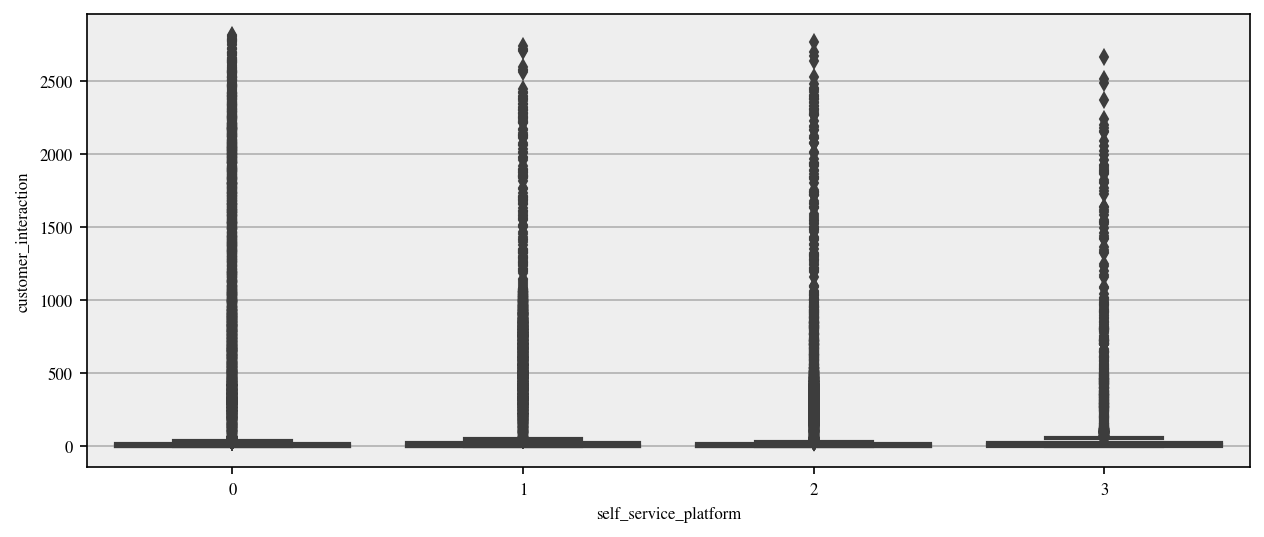

In [48]:
sns.boxplot(y = train['customer_interaction'],x = train['self_service_platform'])

In [49]:
train['video_centric']=train['var8']+train['var15']+train['var14']

In [71]:
train['self_service'] = train['var38'].apply(lambda x:'self_service' if x==2 else x  )

In [72]:
train['self_service'].value_counts()

3               185152
0                65235
1                36281
self_service     13332
Name: self_service, dtype: int64

In [77]:
train['self_service'].replace([3,1,0,'self_service'],[0,0,0,1],inplace=True)

In [79]:
train['self_service'].value_counts()

0    286668
1     13332
Name: self_service, dtype: int64

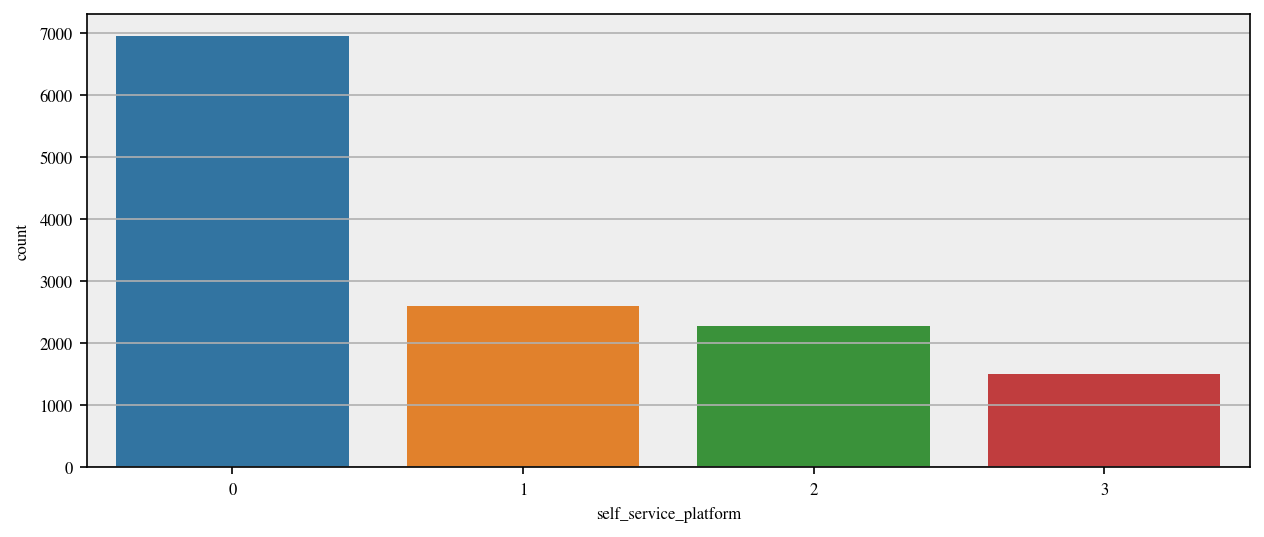

In [82]:
sns.countplot(train[train['self_service']==1]['self_service_platform'])

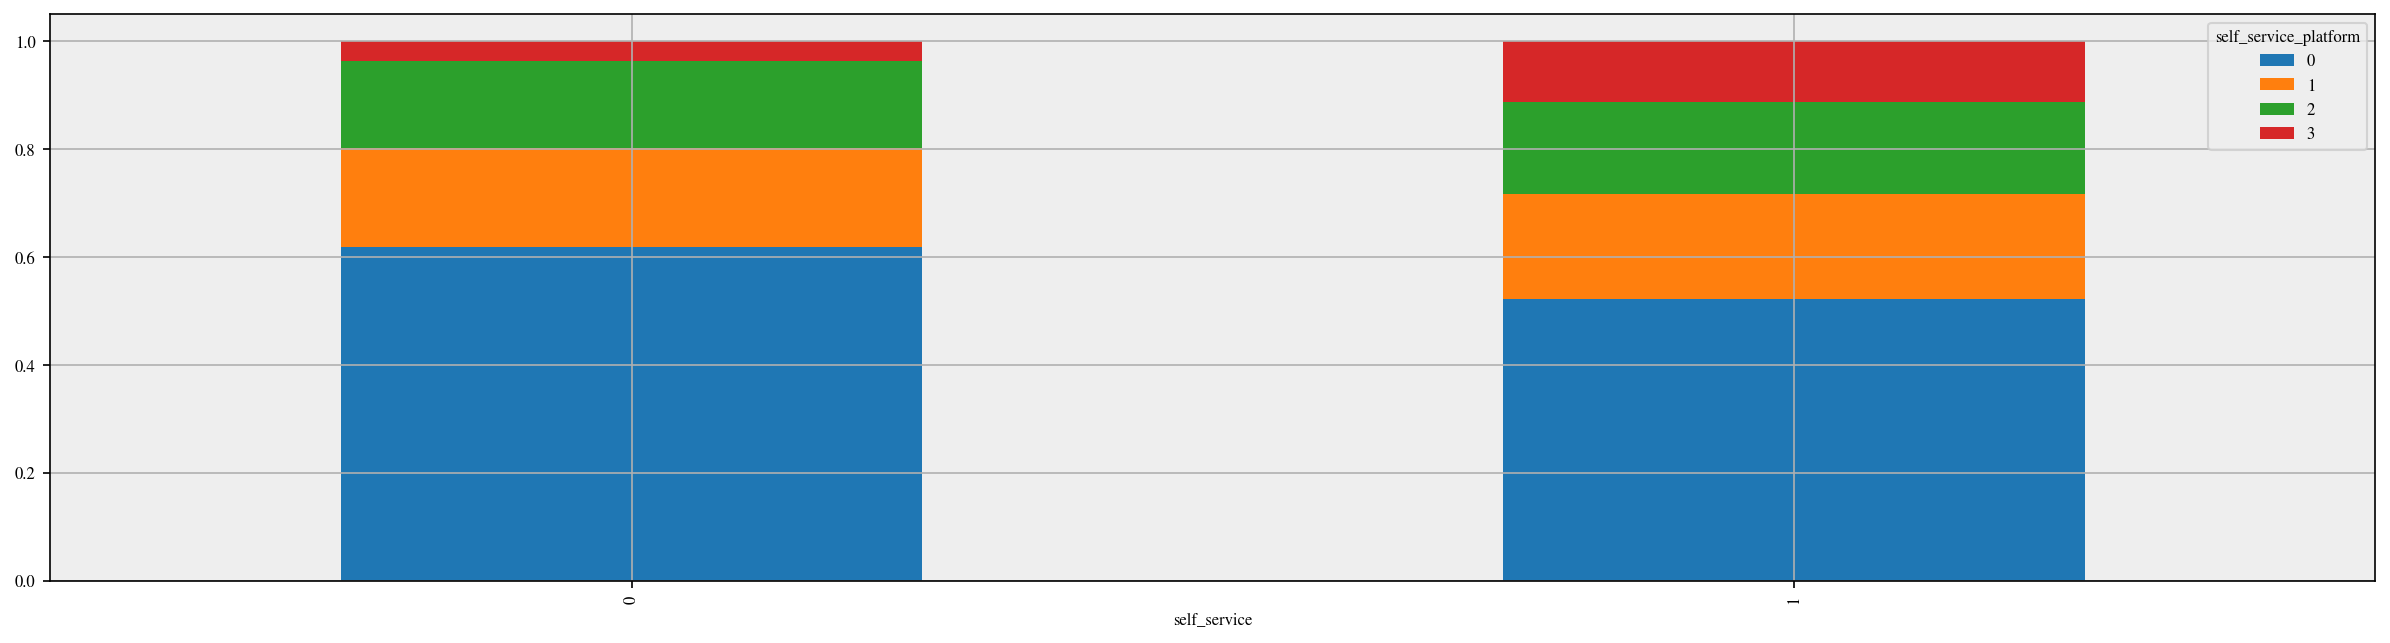

In [83]:
var = pd.crosstab(train['self_service'],train['self_service_platform']) 
var.div(var.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(20,5))


In [110]:
train['economic_standing']=((train['var6']+1)*(train['var22']+train['var9'])*(train['var27']))/((train['var21']+1)/100)

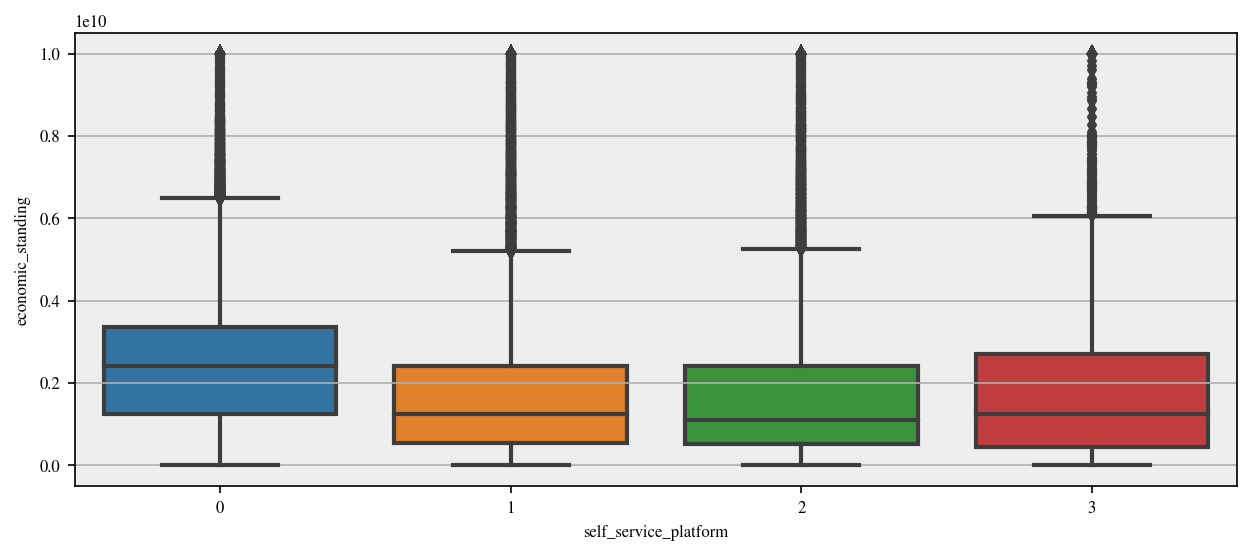

In [119]:
sns.boxplot(y = train['economic_standing'].clip(0,10000000000), x=train['self_service_platform'])

In [108]:
train['var6'].describe()

count    300000.000000
mean          5.039663
std           2.933883
min           0.000000
25%           2.000000
50%           5.000000
75%           8.000000
max           9.000000
Name: var6, dtype: float64

In [100]:
train['var6'].value_counts()

7    46985
8    42404
9    34852
5    33110
0    30269
2    25329
6    24754
4    22605
1    22062
3    17630
Name: var6, dtype: int64

In [ ]:
### What does train['var6'].add(1) do?